In [52]:
import datetime
import math
import numpy as np
import pandas as pd
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import plotly.graph_objects as go
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df = pd.read_csv('National_Bridge_Inventory.csv')


/Users/evanmacayeal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (8,12,14,24,38,43,44,45,46,78,80,82,103,105,109,114,115,116,127) have mixed types. Specify dtype option on import or set low_memory=False.



In [39]:
state_code_abbrev_map = pd.read_csv('State_Codes.csv').set_index('Code').to_dict()['Abbrev']
state_code_name_map = pd.read_csv('State_Codes.csv').set_index('Code').to_dict()['State']


In [40]:
curr_year = float(datetime.datetime.now().year)
df['Age'] = [curr_year - yr for yr in df['YEAR_BUILT_027']]


In [41]:
agg_data = pd.DataFrame()
sdf = df[df['STATE_CODE_001'] != 66].dropna(subset=['Age']) # no state code in documentation for 66
sdf = sdf[sdf['HISTORY_037'] == 5] # no historical bridges otherwise skews age

agg_data['avg age'] = round(sdf.groupby('STATE_CODE_001')['Age'].mean(),2)
agg_data['median age'] = round(sdf.groupby('STATE_CODE_001')['Age'].median(),2)
agg_data['youngest'] = sdf.groupby('STATE_CODE_001')['Age'].min().astype(int)
agg_data['oldest'] = sdf.groupby('STATE_CODE_001')['Age'].max().astype(int)
agg_data['num of bridges'] = sdf.groupby('STATE_CODE_001')['Age'].count().astype(int)
agg_data.index = [state_code_abbrev_map[x] for x in agg_data.index]

agg_data.head()

,avg age,median age,youngest,oldest,num of bridges
AL,49.07,51.0,3,123,15965
AK,37.01,38.0,4,101,1092
AZ,45.35,45.0,4,121,8156
AR,46.83,49.0,4,102,8099
CA,52.30,54.0,4,161,24105


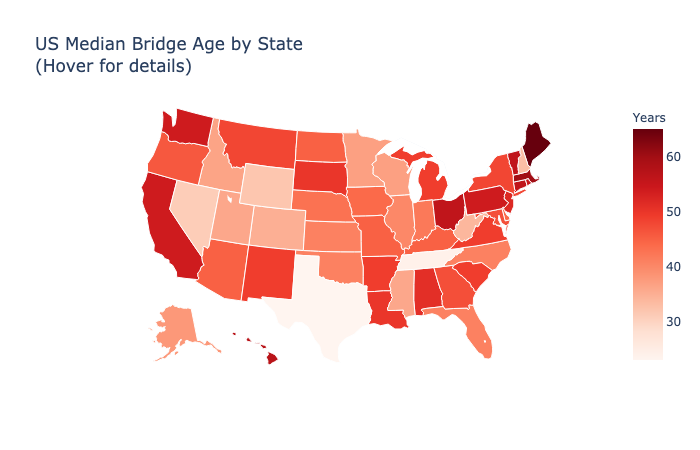

In [51]:
for col in agg_data.columns:
    agg_data[col] = agg_data[col].astype(str)

agg_data['fig_text'] = agg_data.index + '<br>' + \
    'Num of bridges ' + agg_data['num of bridges'] + ' Avg Age ' + agg_data['avg age'] + '<br>' + \
    'Youngest ' + agg_data['youngest'] + ' Oldest ' + agg_data['oldest']


fig = go.Figure(data=go.Choropleth(
    locations=agg_data.index,
    z=agg_data['median age'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=agg_data['fig_text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Years"
))

fig.update_layout(
    title_text='US Median Bridge Age by State<br>(Hover for details)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show('png')


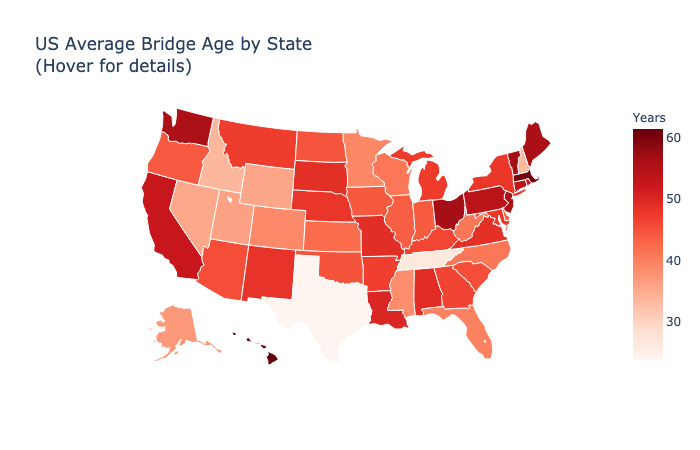

In [50]:
fig = go.Figure(data=go.Choropleth(
    locations=agg_data.index,
    z=agg_data['avg age'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=agg_data['fig_text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Years"
))

fig.update_layout(
    title_text='US Average Bridge Age by State<br>(Hover for details)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show('png')
